In [40]:
import pandas as pd

In [41]:
df=pd.read_csv('./train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [42]:
###Drop Nan Values
df=df.dropna()

In [43]:
## Get the Independent Features
X=df.drop('label',axis=1)

In [44]:
## Get the Dependent features
y=df['label']

In [45]:
y.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [46]:
X.shape

(18285, 4)

In [47]:
y.shape

(18285,)

In [48]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [70]:
pip install tensorflow-gpu==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.6/454.6 KB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 KB 19.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: h5py
    Found existing installation: h

In [71]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [72]:
### Vocabulary size
voc_size=5000

Onehot Representation

In [73]:
messages=X.copy()
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [74]:
messages.reset_index(inplace=True)

In [75]:
import nltk
import re
from nltk.corpus import stopwords

In [76]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
1

In [78]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [79]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[3245, 3225, 1767, 2673, 1617, 4411, 2027, 4435, 3315, 432],
 [1110, 451, 4445, 186, 1982, 1952, 768],
 [233, 1550, 730, 122],
 [3744, 4615, 328, 1298, 2219, 760],
 [593, 1982, 4696, 3759, 4375, 393, 1982, 457, 702, 4894],
 [2836,
  3084,
  2842,
  804,
  3144,
  1533,
  2767,
  4307,
  3114,
  3312,
  4422,
  1723,
  2922,
  2331,
  768],
 [1358, 205, 1199, 4654, 110, 1251, 3987, 2780, 1824, 2253, 2512],
 [1700, 415, 3801, 886, 1791, 3499, 1533, 1894, 1824, 2253, 2512],
 [2328, 4441, 2644, 2249, 4139, 4256, 2809, 1684, 1533, 4021],
 [2126, 4447, 831, 2315, 1758, 128, 494, 545],
 [3566, 4815, 3330, 4498, 3165, 4971, 3397, 4766, 749, 2558, 3652],
 [1298, 4755, 1617, 4256, 1533, 1791],
 [4951, 1004, 4562, 149, 3929, 4099, 4328, 2970, 2132],
 [1339, 384, 219, 1829, 3438, 567, 4613, 1824, 2253, 2512],
 [3894, 1499, 2698, 4735, 3679, 1824, 2253, 2512],
 [2303, 3472, 1886, 4225, 3704, 441, 1023, 1916, 4984, 4551],
 [1852, 4183, 451],
 [93, 1962, 4894, 3222, 1533, 2419, 575, 768],
 [324, 485

Embedding Representation

In [80]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4435 3315  432]
 [   0    0    0 ... 1982 1952  768]
 [   0    0    0 ... 1550  730  122]
 ...
 [   0    0    0 ... 1824 2253 2512]
 [   0    0    0 ... 1302 1751 1284]
 [   0    0    0 ... 2197 4011 2896]]


In [81]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3245,
       3225, 1767, 2673, 1617, 4411, 2027, 4435, 3315,  432], dtype=int32)

In [82]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_4 (LSTM)               (None, 100)               56400     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [83]:
## Creating model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 40)            200000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              112800    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [84]:
len(embedded_docs),y.shape

(18285, (18285,))

In [85]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [86]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

Model Training

In [88]:
### Finally Training
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 21s 94ms/step - loss: 0.2992 - accuracy: 0.8587 - val_loss: 0.2044 - val_accuracy: 0.9176
Epoch 2/10
192/192 [==============================] - 11s 55ms/step - loss: 0.1343 - accuracy: 0.9504 - val_loss: 0.2005 - val_accuracy: 0.9221
Epoch 3/10
192/192 [==============================] - 12s 63ms/step - loss: 0.0946 - accuracy: 0.9682 - val_loss: 0.2786 - val_accuracy: 0.9085
Epoch 4/10
192/192 [==============================] - 12s 64ms/step - loss: 0.0727 - accuracy: 0.9755 - val_loss: 0.2358 - val_accuracy: 0.9132
Epoch 5/10
192/192 [==============================] - 12s 63ms/step - loss: 0.0518 - accuracy: 0.9842 - val_loss: 0.3108 - val_accuracy: 0.9075
Epoch 6/10
192/192 [==============================] - 11s 56ms/step - loss: 0.0335 - accuracy: 0.9908 - val_loss: 0.3897 - val_accuracy: 0.9064
Epoch 7/10
192/192 [==============================] - 11s 58ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.4127 - val_accuracy:

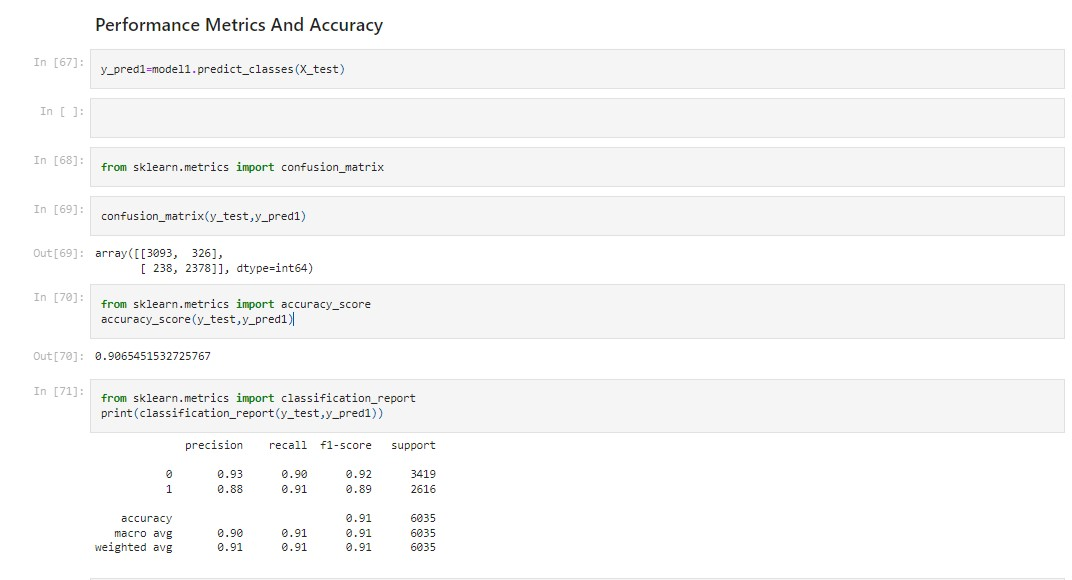